In [277]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [278]:
#импортируем файл и переводим его в csv формат 
sheet_id="1t2Bl9Jc0JCWOaeFgADJ2bVdoLdjDTWno"

df=pd.read_csv(filepath_or_buffer=f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")

In [291]:
df_cop=df.copy()

In [280]:
df_cop

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,"11 693,70",ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,"5 452,70",ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,26.07.21
3,15.0,"13 991,70",ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21
4,16.0,"719,7",ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21
...,...,...,...,...,...,...,...,...
725,285.0,"4 328,70",ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,15.11.21
726,360.0,"3 096,20",ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,"3 096,20",ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,"4 403,70",ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,08.11.21


In [281]:
#функция для предания строковым значений к числовым 
def to_float16(strin):
    return pd.NaT if pd.isna(strin) else pd.to_numeric(strin.replace('\xa0', '').replace(",", "."), errors='coerce').astype('float32')


In [292]:
df_cop["sum"]=df_cop["sum"].apply(to_float16)
df_cop

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaT,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.700195,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.700195,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,26.07.21
3,15.0,13991.700195,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21
4,16.0,719.700012,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,08.06.21
...,...,...,...,...,...,...,...,...
725,285.0,4328.700195,ОПЛАЧЕНО,Васильев,текущая,NaN,оригинал,15.11.21
726,360.0,3096.199951,ОПЛАЧЕНО,Васильев,новая,NaN,НЕТ,NaN
727,360.0,3096.199951,ПРОСРОЧЕНО,Васильев,новая,NaN,НЕТ,NaN
728,373.0,4403.700195,ОПЛАЧЕНО,Михайлов,новая,NaN,оригинал,08.11.21


In [283]:
#Задание 1 
mask=df_cop["status"]=="Июль 2021"
mask_t=df_cop["status"]=="Август 2021"
index_July = df_cop.index[mask].tolist()[0]
index_August = df_cop.index[mask_t].tolist()[0]

df_selection = df_cop.loc[index_July+1:index_August-1]

df_selection["status"].value_counts()
answer_one=df_selection[df_selection.status=="ОПЛАЧЕНО"]["sum"].sum()
answer_one

859895.75

In [284]:
#Задание 3
mask=df_cop["status"]=="Сентябрь 2021"
mask_t=df_cop["status"]=="Октябрь 2021"
index_September = df_cop.index[mask].tolist()[0]
index_October = df_cop.index[mask_t].tolist()[0]

df_selection = df_cop.loc[index_September+1:index_October-1]
managers_score=df_selection.groupby("sale")["sum"].sum().sort_values(ascending=False)
answer_three=managers_score.index[0]
answer_three

'Смирнов'

In [285]:
#Задание 4
mask=df_cop["status"]=="Октябрь 2021"
index_October = df_cop.index[mask].tolist()[0]

df_selection = df_cop.loc[index_October+1:]
answer_four=df_selection["new/current"].value_counts().sort_values(ascending=False).index[0]
answer_four

'текущая'

In [286]:
# функция для создания datetimeтипа данных в столбце receiving date 
def to_date_time(date):
    if pd.isna(date) or date == "-":
        return pd.NaT
    else:
        try:
            return pd.to_datetime(date, format="%d.%m.%Y")
        except ValueError:
            # If parsing fails, try with two-digit year
            return pd.to_datetime(date, format="%d.%m.%y")


In [293]:
# 5 задание 
df_cop["receiving_date"]=df_cop["receiving_date"].apply(to_date_time)
mask=df_cop["status"]=="Июнь 2021"
mask_t=df_cop["status"]=="Июль 2021"
index_June = df_cop.index[mask].tolist()[0]
index_July = df_cop.index[mask_t].tolist()[0]

df_selection = df_cop.loc[index_July+1:index_August-1]
df_selection=df_selection[df_selection["receiving_date"].dt.month==8]
df_selection=df_selection.dropna(subset=["receiving_date"])
answer_five=df_selection.count().iloc[0]
answer_five



81

In [288]:
# 2 задание 
months=["Май","Июнь","Июль","Август","Сентябрь","Октябрь"]
income=[]
for i in range(len(months)):
    try:
        mask_one=df_cop["status"]==f"{months[i]} 2021"
        mask_two=df_cop["status"]==f"{months[i+1]} 2021"
        index_one = df_cop.index[mask_one].tolist()[0]
        index_two = df_cop.index[mask_two].tolist()[0]
        df_selection = df_cop.loc[index_one+1:index_two-1]
        gain=df_selection[df_selection.status=="ОПЛАЧЕНО"]["sum"].sum()
        income.append(gain)
    except:
        mask_one=df_cop["status"]==f"{months[-1]} 2021"
        index_one = df_cop.index[mask_one].tolist()[0]
        df_selection = df_cop.loc[index_one+1:]
        gain=df_selection[df_selection.status=="ОПЛАЧЕНО"]["sum"].sum()
        income.append(gain)
income

        

[788974.2, 801441.56, 859895.75, 770840.0, 725120.75, 465513.2]

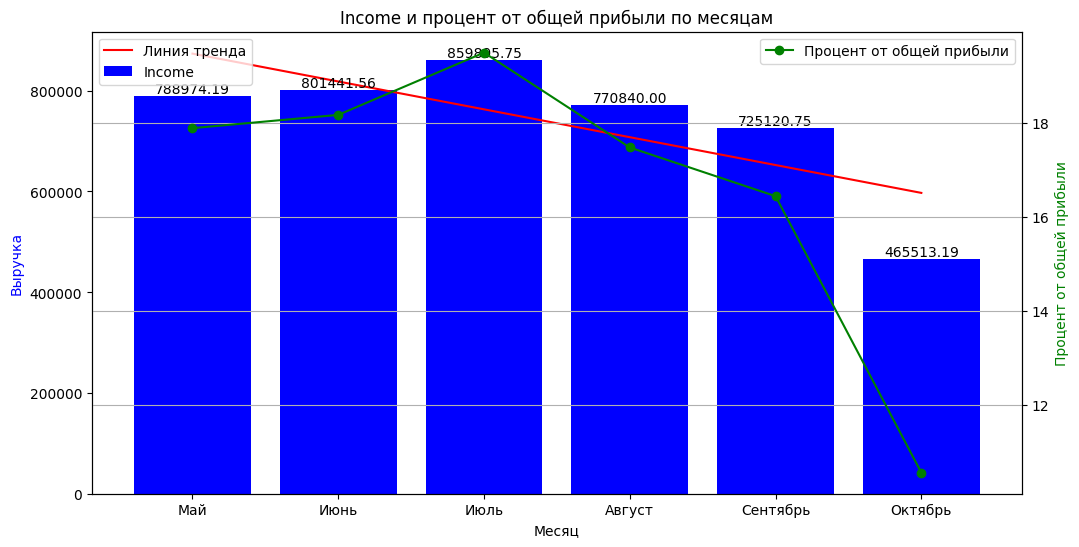

In [289]:
total_revenue = sum(income)

percentage_revenue = [(r / total_revenue) * 100 for r in income]

fig, ax1 = plt.subplots(figsize=(12, 6))

bars = ax1.bar(months, income, color='blue', label='Income')

x = np.arange(len(months))
coefficients = np.polyfit(x, income, 1)
trend_line = np.polyval(coefficients, x)

ax1.plot(months, trend_line, color='red', label='Линия тренда')

for bar, value in zip(bars, income):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{value:.2f}', ha='center', va='bottom')

ax2 = ax1.twinx()
ax2.set_ylabel('Процент от общей прибыли', color='green')
ax2.plot(months, percentage_revenue, color='green', marker='o', label='Процент от общей прибыли')

plt.title('Income и процент от общей прибыли по месяцам')
ax1.set_xlabel('Месяц')
ax1.set_ylabel('Выручка', color='blue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(axis='y')

plt.show()

In [302]:
#Финальное задание 
mask_t=df_cop["status"]=="Июль 2021"
index_t = df_cop.index[mask_t].tolist()[0]

df_selection = df_cop.loc[2:index_t-1]
df_cur = df_selection[(df_selection["new/current"] == "текущая")&
                        (df_selection["status"] != "ПРОСРОЧЕНО")&
                        (df_selection["receiving_date"].dt.month >= 7) & 
                        (df_selection["receiving_date"].dt.day >= 1)]

df_new = df_selection[(df_selection["new/current"] == "новая") & 
                      (df_selection["status"] == "ОПЛАЧЕНО") & 
                      (df_selection["receiving_date"].dt.month >= 7) & 
                      (df_selection["receiving_date"].dt.day >= 1)]
df_new.loc[:, "residue"] = df_new["sum"] * 0.07
df_cur.loc[:, "residue"] = df_cur["sum"].apply(lambda x: x * 0.05 if x > 10000 else x * 0.03)

C:\Users\ropin\AppData\Local\Temp\ipykernel_36692\608758682.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.loc[:, "residue"] = df_new["sum"] * 0.07
C:\Users\ropin\AppData\Local\Temp\ipykernel_36692\608758682.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cur.loc[:, "residue"] = df_cur["sum"].apply(lambda x: x * 0.05 if x > 10000 else x * 0.03)


document
оригинал    154
Name: count, dtype: int64

In [309]:
coct_table=pd.concat([df_new,df_cur],axis=0)

answer_final=coct_table.groupby("sale")["sum"].sum().sort_values(ascending=False)
answer_final

sale
Петрова         273685.0625
Смирнов       178021.828125
Иванов        149812.828125
Кузнецова        141471.875
Андреев       103276.304688
Селиванов        93981.8125
Филимонова     63408.722656
Васильев       30996.695312
Соколов         8973.700195
Name: sum, dtype: object